In [1]:
import grpc
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from model_server import server_pb2, server_pb2_grpc
from model_server.utils import create_tensor_proto, create_predict_request, create_array_from_proto

In [3]:
channel = grpc.insecure_channel('localhost:5001')

In [4]:
# create a stub (client)
stub = server_pb2_grpc.ModelServerStub(channel)

In [5]:
image = tf.keras.preprocessing.image.load_img("../images/lion.jpg", target_size=(299,299))

In [6]:
image = np.array(image)

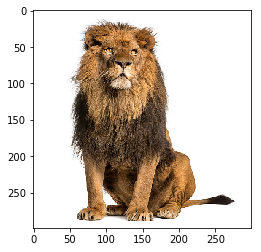

In [7]:
plt.imshow(image)

In [8]:
image.shape

(299, 299, 3)

In [9]:
image = tf.keras.applications.inception_v3.preprocess_input(image.astype("float32"))

In [10]:
input_array_dict = {"image_tensor": create_tensor_proto(np.expand_dims(image, axis=0))}

In [11]:
predict_request= create_predict_request(input_array_dict, name="keras_inception_v3_call")

In [12]:
# model = tf.keras.applications.InceptionV3(include_top=True, weights="imagenet")

In [13]:
# pred = model.predict(np.expand_dims(image, axis=0))

In [14]:
%%time
# make the call
response = stub.GetPredictions(predict_request)

CPU times: user 1.72 ms, sys: 789 µs, total: 2.51 ms
Wall time: 203 ms


In [15]:
output = create_array_from_proto(response.outputs["prediction_scores"])

In [16]:
output.shape

(1, 1000)

In [17]:
output[0][np.argmax(output)]

0.9477381

In [18]:
np.argmax(output)

291